In [ ]:
from textwrap import fill
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

### Explore data

In [ ]:
df = pd.read_csv("alzheimers_disease_data.csv")

In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [ ]:
print("Missing Values in %")
print(df.isna().mean() * 100)

Missing Values in %
PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation         

In [ ]:
print("\nDuplicate Rows Count:")
print(df.duplicated().sum())
df.describe().T


Duplicate Rows Count:
0


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [ ]:
df = df.drop(['DoctorInCharge', 'PatientID'], axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:\n", missing_values)
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


### Data transfomation

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

Index([], dtype='object')


In [ ]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_columns_to_scale = [col for col in num_columns if col not in categorical_cols and col != 'Diagnosis']

num_columns_to_scale

scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])

print("Scaled Numerical Data:")
df[num_columns_to_scale].head()

Scaled Numerical Data:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,-0.212368,-1.012644,-0.700408,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,...,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.657048
1,1.567757,-1.012644,-0.700408,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,...,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,1.521959
2,-0.212368,-1.012644,2.311955,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,...,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.657048
3,-0.101111,0.987514,-0.700408,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,...,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.657048
4,1.567757,-1.012644,-0.700408,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,...,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.657048


### Find Correlation among features

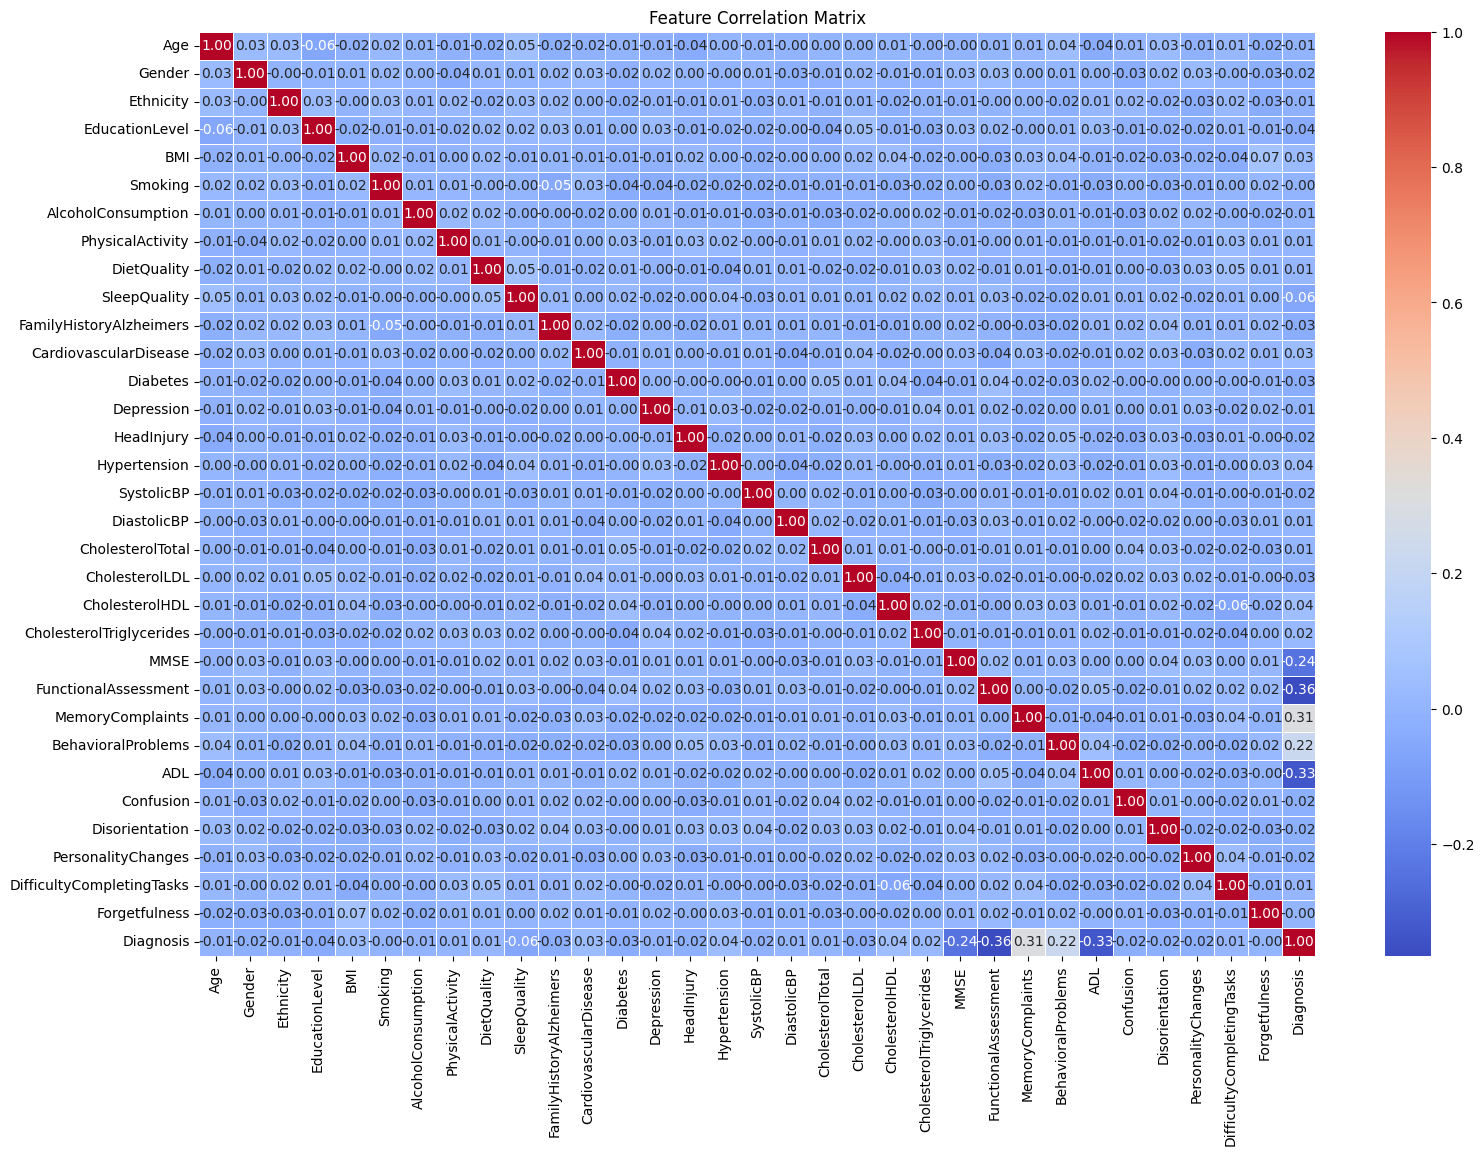

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Train and evaluate models

### Logistic Regression

#### Train

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, roc_curve, auc, precision_recall_curve,
    confusion_matrix, f1_score, precision_score, recall_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

log_reg = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Train model
log_reg.fit(X_train, y_train)


Cross-validation accuracy scores: [0.7641196  0.84385382 0.81395349 0.80066445 0.83333333]
Mean CV Accuracy: 0.81


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)


Validation Set Accuracy: 82.92%

Test Set Accuracy: 81.42%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.84       209
           1       0.68      0.89      0.77       114

    accuracy                           0.81       323
   macro avg       0.80      0.83      0.81       323
weighted avg       0.84      0.81      0.82       323



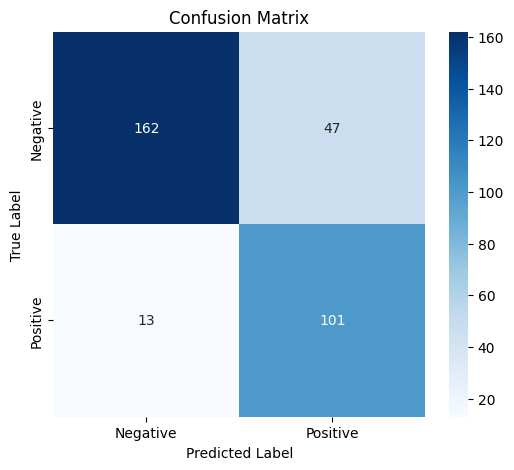

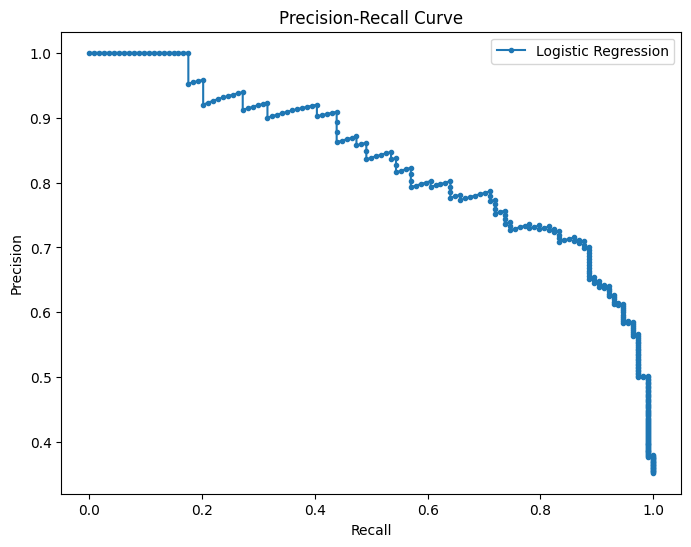

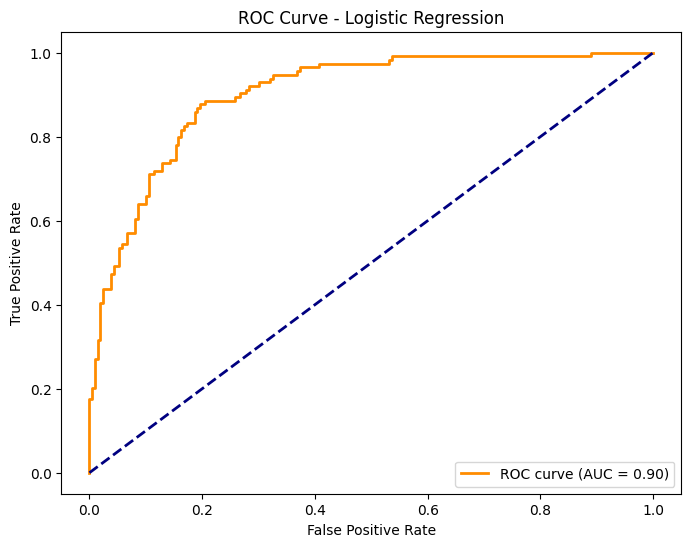

In [ ]:
# Predictions
val_pred_proba = log_reg.predict_proba(X_val)[:, 1]
val_pred = (val_pred_proba > 0.5).astype(int)

test_pred_proba = log_reg.predict_proba(X_test)[:, 1]
test_pred = (test_pred_proba > 0.5).astype(int)

# Model Evaluation
print("\nValidation Set Accuracy: {:.2f}%".format(accuracy_score(y_val, val_pred) * 100))
print("\nTest Set Accuracy: {:.2f}%".format(accuracy_score(y_test, test_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

### Deep Learning

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

#### Training

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.125, random_state=42)

def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

model = create_model((X_train.shape[1],))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=75,
    batch_size=64,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Predictions
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,185 (20.25 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5768 - auc: 0.5893 - loss: 0.7848 - val_accuracy: 0.5535 - val_auc: 0.7093 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 2/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6741 - auc: 0.7191 - loss: 0.6157 - val_accuracy: 0.7163 - val_auc: 0.7872 - val_loss: 0.6075 - learning_rate: 0.0010
Epoch 3/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7235 - auc: 0.7792 - loss: 0.5475 - val_accuracy: 0.7535 - val_auc: 0.8256 - val_loss: 0.5495 - learning_rate: 0.0010
Epoch 4/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7735 - auc: 0.8360 - loss: 0.4856 - val_accuracy: 0.7860 - val_auc: 0.8467 - val_loss: 0.5029 - learning_rate: 0.0010
Epoch 5/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7986 - auc: 0.8578 - loss: 0.4493 - val_accuracy: 0.7814 - val_auc: 0.8635 - val_loss: 0.4654 - learning_rate: 0.0010
Epoch 6/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8183 - auc: 0.8812 -

Test Accuracy: 0.83
Precision: 0.79
Recall: 0.71
F1 Score: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



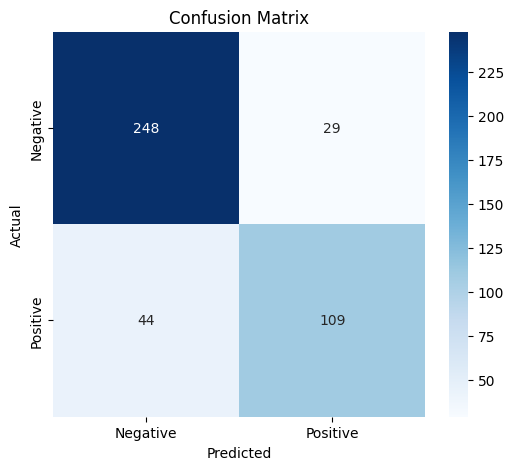

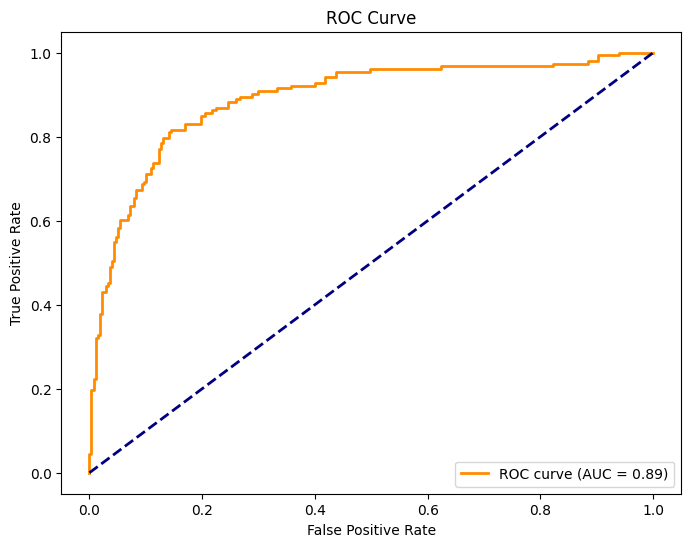

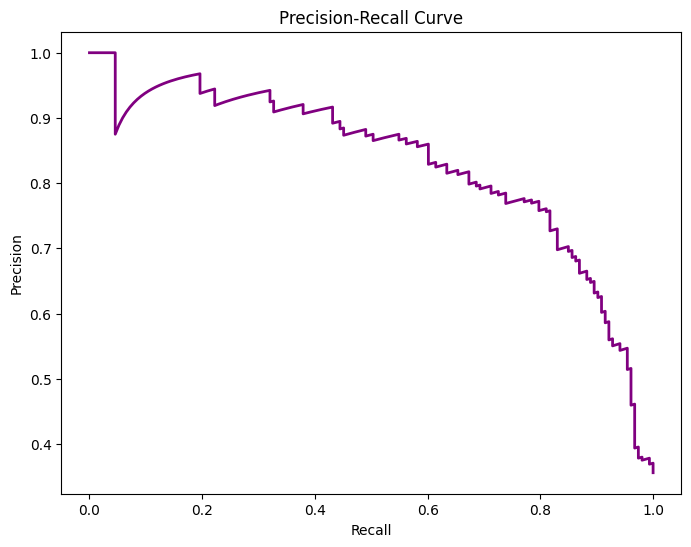

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### Evaluating

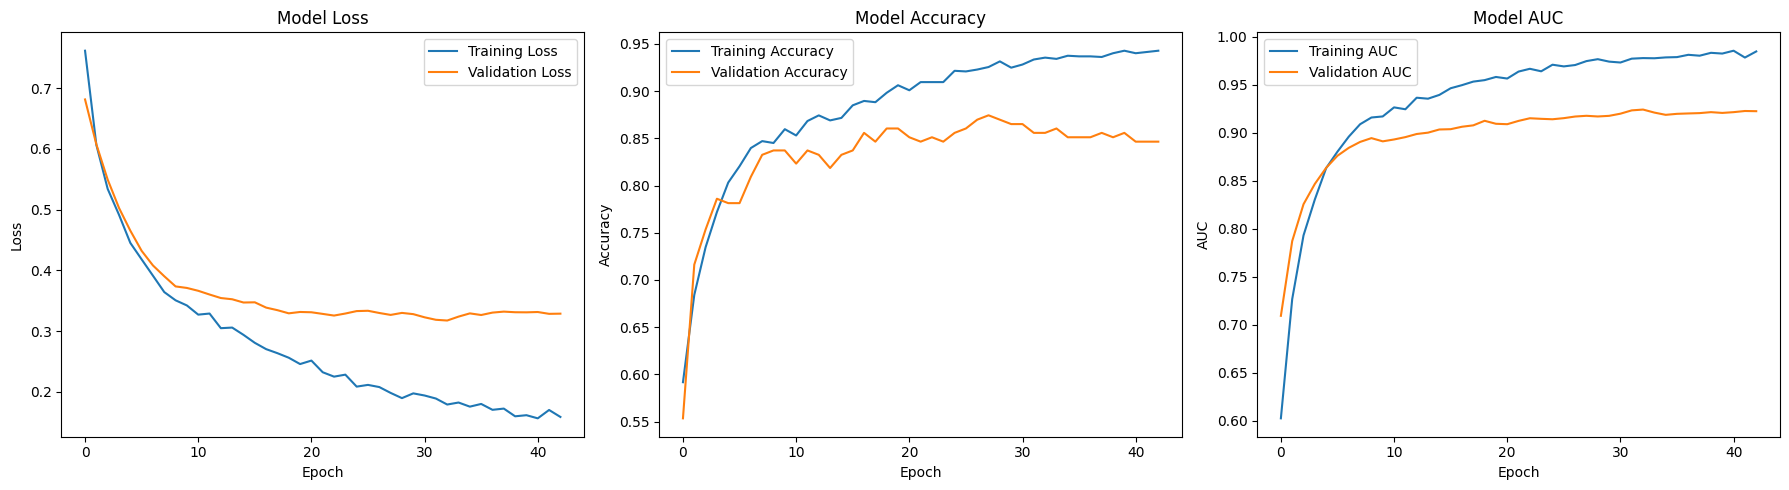

In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history.get('accuracy', []), label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# UC
plt.subplot(1, 3, 3)
plt.plot(history.history.get('auc', []), label='Training AUC')
plt.plot(history.history.get('val_auc', []), label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def get_feature_importance(model, X, y, feature_names):
    baseline_score = model.evaluate(X, y, verbose=0)[1]
    importance_scores = []

    for i in range(X.shape[1]):
        X_temp = X.copy()
        np.random.shuffle(X_temp[:, i])
        new_score = model.evaluate(X_temp, y, verbose=0)[1]
        importance = baseline_score - new_score
        importance_scores.append(importance)

    return pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=False)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
feature_importance = get_feature_importance(model, X_test_df.values, y_test, X_test_df.columns)

feature_importance.head(10)

,feature,importance
26,ADL,0.102326
23,FunctionalAssessment,0.090698
24,MemoryComplaints,0.076744
25,BehavioralProblems,0.041860
22,MMSE,0.037209
20,CholesterolHDL,0.018605
30,DifficultyCompletingTasks,0.011628
31,Forgetfulness,0.009302
19,CholesterolLDL,0.009302
8,DietQuality,0.006977


### Random Forest

#### Train

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, auc, f1_score
)
from sklearn.preprocessing import StandardScaler, LabelEncoder

np.random.seed(42)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced",
    random_state=42
  )

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_full, y_train_full, cv=cv, scoring='roc_auc')

rf_model.fit(X_train_full, y_train_full)

y_pred_train = rf_model.predict(X_train_full)
y_pred_test = rf_model.predict(X_test)
y_pred_proba_test = rf_model.predict_proba(X_test)[:, 1]

#### Evaluate

Cross-Validation AUC: 0.9549 ± 0.0080
Train Accuracy: 0.9878
Test Accuracy: 0.9372
Test ROC-AUC: 0.9432
Test PR-AUC: 0.9282
Test F1-Score: 0.9085

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.94      0.88      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
[[269   9]
 [ 18 134]]

Top 10 Important Features:
                     Feature  Importance
23      FunctionalAssessment    0.197232
26                       ADL    0.168249
22                      MMSE    0.134436
24          MemoryComplaints    0.092951
25        BehavioralProblems    0.049274
20            CholesterolHDL    0.028999
6         AlcoholConsumption    0.027814
21  CholesterolTriglycerides    0.027576
8                DietQuality    0.027494
18         

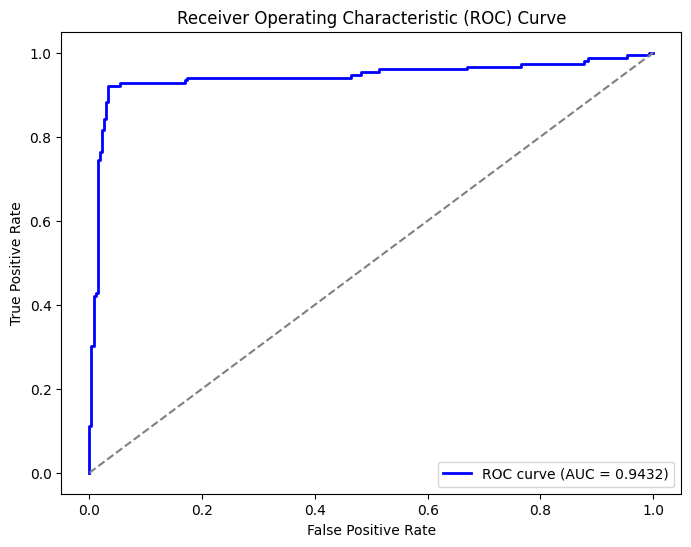

In [ ]:
train_acc = accuracy_score(y_train_full, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_test)
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, y_pred_test)

print(f"Cross-Validation AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC: {pr_auc:.4f}")
print(f"Test F1-Score: {f1:.4f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(cm)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

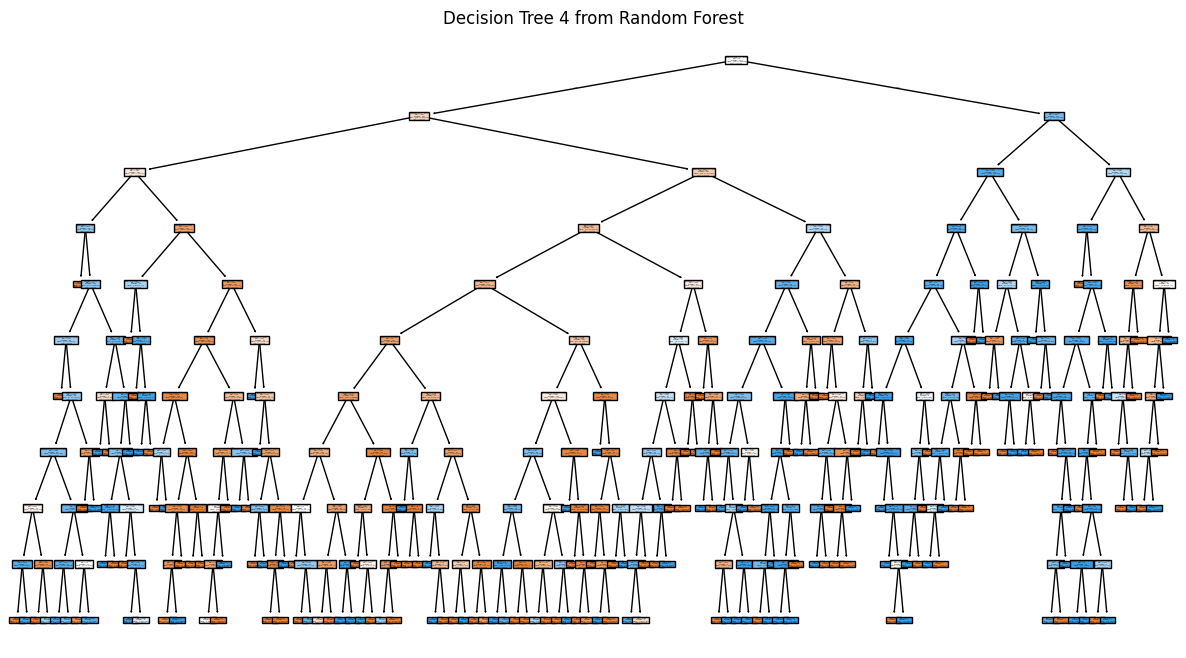

In [ ]:
# Print One Decision Tree from the Random Forest
tree_idx = 1  # Select first tree
plt.figure(figsize=(15, 8))
plot_tree(rf_model.estimators_[tree_idx], feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True)
plt.title(f"Decision Tree {tree_idx + 1} from Random Forest")
plt.show()

In [ ]:
from sklearn.tree import plot_tree, export_text
# Alternatively, print the textual representation
tree_rules = export_text(rf_model.estimators_[tree_idx], feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- CholesterolTriglycerides <= 1.37
|   |--- ADL <= -0.10
|   |   |--- PhysicalActivity <= 0.36
|   |   |   |--- BMI <= -1.70
|   |   |   |   |--- DiastolicBP <= -1.64
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- DiastolicBP >  -1.64
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- BMI >  -1.70
|   |   |   |   |--- FunctionalAssessment <= -0.08
|   |   |   |   |   |--- CholesterolTriglycerides <= -1.68
|   |   |   |   |   |   |--- SleepQuality <= -0.04
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- SleepQuality >  -0.04
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- CholesterolTriglycerides >  -1.68
|   |   |   |   |   |   |--- MMSE <= 1.06
|   |   |   |   |   |   |   |--- DiastolicBP <= -0.08
|   |   |   |   |   |   |   |   |--- FunctionalAssessment <= -0.33
|   |   |   |   |   |   |   |   |   |--- PhysicalActivity <= -0.72
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   | 